{2: [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [1.416, 1.26, 1.249, 1.19, 1.358, 1.318, 1.528, 1.362, 1.26, 1.47, 1.408, 1.634, 1.686, 1.259, 1.425, 1.193, 2.089, 1.297, 1.77, 1.198, 2.035, 1.421, 1.37, 1.366, 1.286, 1.158, 1.431, 1.246, 1.107, 1.128, 1.317, 1.124, 1.851, 1.503, 1.184, 1.269, 1.195, 1.578, 1.402, 1.15, 1.123, 1.571, 1.344, 1.156, 1.798, 4.013, 1.09, 1.358, 1.434, 1.52]], 3: [[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], [2.59, 4.848, 2.505, 2.176, 5.216, 2.157, 2.114, 1.942, 2.06, 1.92, 2.104, 2.086, 4.607, 2.044, 2.153, 1.989, 1.959, 4.89, 1.944, 1.955, 1.971, 1.898, 1.941, 2.055, 2.057, 2.007, 2.1, 2.038, 2.063, 2.078, 2.386, 2.256, 1.991, 2.131, 1.892, 2.186, 2.072, 1.909, 2.432, 2.003, 1.888, 2.311, 2.13

{2: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [2.303, 2.069, 2.083, 2.204, 2.202, 2.078, 2.187, 2.869, 3.104, 2.625, 2.164, 2.452, 3.723, 3.465, 3.655, 2.533, 3.415, 2.437, 1.897, 2.001, 2.454, 2.926, 1.988, 2.643, 2.719, 2.458, 2.76, 1.993, 2.045, 2.742, 2.35, 2.221, 2.93, 2.828, 2.944, 3.279, 2.009, 2.048, 1.924, 1.936, 1.683, 1.939, 1.834, 1.844, 1.771, 1.769, 1.728, 1.827, 1.756, 1.778]], 3: [[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [4.156, 4.308, 4.1, 4.456, 4.218, 4.287, 4.099, 4.331, 4.405, 6.603, 4.676, 4.123, 4.49, 3.993, 4.152, 4.103, 4.451, 4.265, 4.258, 4.441, 4.675, 4.328, 4.294, 4.704, 4.282, 4.314, 4.526, 4.101, 4.185, 4.175, 4.202, 4.215, 4.115, 4.389, 4.329, 4.186, 4.109, 6.188, 5.304, 5.538, 5.764, 5.

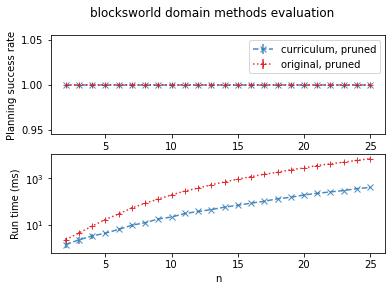

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import os
import argparse

def plot(domain):
    dir = "./ICAPS23_experiments_"
    # dir = "/home/rli12314/SHELL/ICAPS23EXP/ICAPS23_experiments_"
    domains = [domain]
    modes = ['curriculum', 'original']
    prune = [True]
    plot = ['run_time', 'number_of_methods']         
    num_probs = 25

    for domain in domains:
        prec = [True] if domain == 'logistics' else [False]
        fig, axs = plt.subplots(2)
        for mode in modes:
            for is_prune in prune:
                for has_precondition in prec:                
                    planning_results = {}
                    learning_results = {}
                    base = {}
                    for size in range(2,num_probs+2):
                        for count in range(50):
                            try:
                                with open(dir + domain + "/results/plans/plan_{}_{}{}{}_{}_{}.txt".format(
                                    domain, 
                                    mode, 
                                    '_prune' if is_prune else '', 
                                    '_prec' if has_precondition else '',
                                    size,
                                    count
                                    ), 'r') as file:
                                    first_line = file.readline()
    #                                 print(size, count, has_prec, mode, is_prune, size, count, first_line)
                                    num_count_measure_time = first_line.rstrip().split(',')
    #                                 print(num_count_measure_time)
                                    if len(num_count_measure_time) == 4:
                                        if int(num_count_measure_time[0]) not in planning_results:
                                            planning_results[int(num_count_measure_time[0])] = [[int(num_count_measure_time[2])], [float(num_count_measure_time[3])]]
                                        else:
                                            planning_results[int(num_count_measure_time[0])][0].append(int(num_count_measure_time[2]))
                                            planning_results[int(num_count_measure_time[0])][1].append(float(num_count_measure_time[3]))
                            except IOError:
    #                             print("Warning: File does not appear to exist.")
                                pass
                    
                            try:
                                with open(dir + domain + "/results/methods/{}_{}{}{}_{}_{}.txt".format(
                                    domain, 
                                    mode, 
                                    '_prune' if is_prune else '', 
                                    '_prec' if has_precondition else '',
                                    size,
                                    count
                                    ), 'r') as file:

    #                                 first_line = file.readline()
    # #                                 print(size, count, has_prec, mode, is_prune, size, count, first_line)
    #                                 num_count_measure_time = first_line.rstrip().split(',')
    #                                 if int(num_count_measure_time[0]) not in results:
    #                                     learning_results[int(num_count_measure_time[0])] = [[int(num_count_measure_time[2])], [float(num_count_measure_time[3])]]
    #                                 else:
    #                                     learning_results[int(num_count_measure_time[0])][0].append(int(num_count_measure_time[2]))
    #                                     learning_results[int(num_count_measure_time[0])][1].append(float(num_count_measure_time[3]))


                                    first_line = file.readline()
        #                                 print(size, count, has_prec, mode, is_prune, size, count, first_line)
                                    num_count_measure_time = first_line.rstrip().split(',')
                                    if len(num_count_measure_time) == 4 and int(num_count_measure_time[0]) not in base and int(num_count_measure_time[2]) > 0:
                                        base[size] = 1
                                    else:
                                        base[size] += 1
                            except IOError:
        #                             print("Warning: File does not appear to exist.")
                                pass
        #                         else:
        #                             print("else what?")

                    if mode == 'curriculum':
                        color = '#377eb8'
                    elif mode == 'original':
                        color = '#e41a1c'
                    else:
                        color = 'green'

                    # PLOT PLANNING SUCCESS RATE
                    print(planning_results)
                    print(base)
                    y_success_rate = [0 for n in base.keys() if base[n] == 50]
                    print(y_success_rate)
                    x = list(range(2,len(y_success_rate)+2))
                    print("x: ", x)
                    for i in planning_results.keys():
                        y_success_rate[i-2] = len([1 for plan_length in planning_results[i][0] if plan_length > 0])/50
                    print(y_success_rate)
                    e_success_rate = [ 0 for i in x]
                    axs[0].errorbar(x, y_success_rate, yerr=e_success_rate, 
                        color = color,
                        # lw = '1.0' if is_prune else '1.5',
                        label="{}{}{}".format(mode, ', pruned' if is_prune else '', ', prec' if has_precondition else ''),
                        ls='--' if mode == 'curriculum' else ':' ,
                        marker = 'x' if mode == 'curriculum' else '+',
                        alpha=0.9)
                    
                    # PLOT PLANNING TIME
                    runtime = {}
                    for i in base.keys():
                        runtime[i] = np.full(base[i], 600000.0)
                    for i in planning_results.keys():
                        print(runtime[i], planning_results[i][1])
                        for idx in range(len(planning_results[i][1])):
                            runtime[i][idx] = planning_results[i][1][idx]
                        # runtime[0:len(planning_results[i][1])+1] = planning_results[i][1]
                        print('after: ', runtime[i])
                    print('runtime: ', runtime)
                    y_runtime = [ statistics.mean(runtime[i]) for i in x ]
                    e_runtime = [ statistics.pstdev(runtime[i]) for i in x ]
                    # print(x)
                    # print(y_number_of_methods)
                    # print(e_number_of_methods)
                    # print(y_runtime)
                    # print(e_runtime)

                    axs[1].errorbar(x, y_runtime, yerr=e_runtime, 
                        color = color,
                        # lw = '1.0' if is_prune else '1.5',
                        label="{}{}{}".format(mode, ', pruned' if is_prune else '', ', prec' if has_precondition else ''),
                        ls='--' if mode == 'curriculum' else ':' ,
                        marker = 'x' if mode == 'curriculum' else '+',
                        alpha=0.9)
        fig.suptitle('{} domain methods evaluation'.format(domain))
        axs[0].legend()
        axs[0].set_ylabel('Planning success rate')
        # axs[1].legend()
        axs[1].set_xlabel('n')
        axs[1].set_ylabel('Run time (ms)')
        # axs[0].set_yscale('log')
        axs[1].set_yscale('log')
        print("finish")

plot('blocksworld')
